Task Performance Measures for Cognitive Workload Evaluation using EEG signals

**BE Project Group id 6**

Swarali Belsare

Maitreyi Kale

Priya Ghayal

Aishwarya Gogate

In [ ]:
from google.colab import drive
drive.mount('/content/drive' , force_remount = True)
from numpy import load

Mounted at /content/drive


##### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

%matplotlib inline

##### Functions for processing data


Alpha - AF3,AF7,P7,O1,O2 

Beta - AF3,F3,F7,O1,O2

Gamma - AF4,FC6,O1,O2

In [ ]:
#7-32 Data
def load_data():
  path = '/content/drive/MyDrive/csv/'

  all_lo = list()
  all_hi = list()
  for i in range(1,49):
      if i == 5 or i == 24 or i == 42:
        continue
      
      drop_cols = ['Time','FC5','T7','T8','P8','F4','F8'] 
    
      file_path_hi = path+str(i)+'hi'
      print(file_path_hi)

      df_hi = pd.read_csv(file_path_hi)
      df_hi.drop(drop_cols, axis =1 , inplace = True)
      df_hi.reset_index(drop = True, inplace = True)
      
      values_hi = df_hi.values
      all_hi.append(values_hi)

      
      file_path_lo = path+str(i)+'lo'
      print(file_path_lo)
      
      df_lo = pd.read_csv(file_path_lo)
      df_lo.drop(drop_cols, axis =1 , inplace = True)
      df_lo.reset_index(drop = True, inplace = True)

      values_lo = df_lo.values
      all_lo.append(values_lo)
  return all_hi,all_lo
    

In [ ]:
def len_sequences(all):
  len_sequences = []
  for one_seq in all:
      len_sequences.append(len(one_seq))
  print(pd.Series(len_sequences).describe())

In [ ]:
#Padding the sequence with the values in last row to max length
def equalize_length(all):
  to_pad = 19200
  new_seq = []
  for one_seq in all:
      len_one_seq = len(one_seq)
      last_val = one_seq[-1]
      n = to_pad - len_one_seq
    
      to_concat = np.repeat(one_seq[-1], n).reshape(8,n).transpose()
      new_one_seq = np.concatenate([one_seq, to_concat])
      new_seq.append(new_one_seq)
  final_seq = np.stack(new_seq)

  #truncate the sequence to length 18000
  from tensorflow.python.keras.preprocessing import sequence
  seq_len = 18000
  eeg_sequence =sequence.pad_sequences(final_seq, maxlen=seq_len, padding='post', dtype='float', truncating='post')
  return eeg_sequence

In [ ]:
def scale_data(input):
  stdscaler = StandardScaler()
  scaled = stdscaler.fit_transform(input)
  return scaled

In [ ]:
def generate_label():
  levels = [ 'H',	 'L',	 'M',	 'L',	 'M',	 'L',	 'M',	 'L',	'H',	 'M',	 'M',	 'L',	 'H',	 'L',	 'H',	 'L',	 'M',	 'L',	 'M',	 'L',	 'M',	 'L',	 'H',	 'L',	 'H',	 'L',	 'M',	 'L',	 'H',	 'L',	 'H',	 'L',	 'H',	 'M',	 'M',	 'L',	 'H',	 'L',	 'M',	 'L',	 'H',	 'M',	 'M',	 'L',	'M',	 'L',	 'H',	 'L',	 'M',	 'L',	 'H',	 'L',	 'M',	 'L',	 'H',	 'L',	 'M',	 'L',	 'H',	 'L',	 'M',	 'L',	 'H',	 'L',	 'M',	 'L',	 'H',	 'L',	 'H',	 'L',	 'M',	 'L',	 'H',	 'L',	 'M',	 'L',	 'M',	 'L','H',	 'L',	 'H',	 'L',	 'H',	 'L',	 'H',	 'L',	 'H',	 'L',	 'H',	 'L']
  lvl = []
  for i in range(len(levels)):
      if i%2 == 0:
        if levels[i] == 'M':
            lvl.append(0)
        if levels[i] == 'H':
            lvl.append(1)
  print(len(lvl),lvl)
  levels_hi = lvl

  lvl = []
  for i in range(len(levels)):
      if i%2 == 0:
        continue
      else:
        if levels[i] == 'L':
            lvl.append(0)
        if levels[i] == 'M':
            lvl.append(1)
        
  print(len(lvl),lvl)
  levels_lo = lvl

  return levels_hi,levels_lo

##### Loading Data

In [ ]:
all_hi,all_lo = load_data()

/content/drive/MyDrive/csv/1hi
/content/drive/MyDrive/csv/1lo
/content/drive/MyDrive/csv/2hi
/content/drive/MyDrive/csv/2lo
/content/drive/MyDrive/csv/3hi
/content/drive/MyDrive/csv/3lo
/content/drive/MyDrive/csv/4hi
/content/drive/MyDrive/csv/4lo
/content/drive/MyDrive/csv/6hi
/content/drive/MyDrive/csv/6lo
/content/drive/MyDrive/csv/7hi
/content/drive/MyDrive/csv/7lo
/content/drive/MyDrive/csv/8hi
/content/drive/MyDrive/csv/8lo
/content/drive/MyDrive/csv/9hi
/content/drive/MyDrive/csv/9lo
/content/drive/MyDrive/csv/10hi
/content/drive/MyDrive/csv/10lo
/content/drive/MyDrive/csv/11hi
/content/drive/MyDrive/csv/11lo
/content/drive/MyDrive/csv/12hi
/content/drive/MyDrive/csv/12lo
/content/drive/MyDrive/csv/13hi
/content/drive/MyDrive/csv/13lo
/content/drive/MyDrive/csv/14hi
/content/drive/MyDrive/csv/14lo
/content/drive/MyDrive/csv/15hi
/content/drive/MyDrive/csv/15lo
/content/drive/MyDrive/csv/16hi
/content/drive/MyDrive/csv/16lo
/content/drive/MyDrive/csv/17hi
/content/drive/MyDrive/c

##### Data sequence description

In [ ]:
print('SIMKAP\n')
len_sequences(all_hi)
print('\nNo Task\n')
len_sequences(all_lo)

SIMKAP

count       45.000000
mean     17707.533333
std       1475.438080
min      11935.000000
25%      17181.000000
50%      18089.000000
75%      18724.000000
max      19200.000000
dtype: float64

No Task

count       45.000000
mean     18489.911111
std       1161.692394
min      12122.000000
25%      18526.000000
50%      18820.000000
75%      19073.000000
max      19200.000000
dtype: float64


##### Generate equal length sequences

In [ ]:
eeg_sequence_hi = equalize_length(all_hi)
eeg_sequence_lo = equalize_length(all_lo)

In [ ]:
print(eeg_sequence_hi.shape,eeg_sequence_lo.shape)

(45, 18000, 8) (45, 18000, 8)


##### Scaling data

In [ ]:
eeq_sequence_hi = scale_data(eeg_sequence_hi.reshape(45,18000*8))
eeq_sequence_lo = scale_data(eeg_sequence_lo.reshape(45,18000*8))

##### Output labels

In [ ]:
levels_hi,levels_lo = generate_label()

45 [1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]
45 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


##### Split train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train_hi, X_test_hi, y_train_hi, y_test_hi = train_test_split(eeg_sequence_hi, levels_hi, test_size=0.2, random_state=50 , stratify = levels_hi)
X_train_lo, X_test_lo, y_train_lo, y_test_lo = train_test_split(eeg_sequence_lo, levels_lo, test_size=0.2, random_state=50 , stratify = levels_lo)


In [ ]:
X_train_hi = np.array(X_train_hi)
X_test_hi = np.array(X_test_hi)

y_train_hi = np.array(y_train_hi)
y_test_hi = np.array(y_test_hi)

X_train_lo = np.array(X_train_lo)
X_test_lo = np.array(X_test_lo)


y_train_lo = np.array(y_train_lo)
y_test_lo = np.array(y_test_lo)



In [ ]:
nsamples,nx,ny = X_train_hi.shape
X_train_hi = X_train_hi.reshape(nsamples,nx*ny)
X_test_hi = X_test_hi.reshape(len(levels_hi)-nsamples,nx*ny)

nsamples,nx,ny = X_train_lo.shape
X_train_lo = X_train_lo.reshape(nsamples,nx*ny)
X_test_lo = X_test_lo.reshape(len(levels_lo)-nsamples,nx*ny)

ValueError: ignored

##### SMOTE oversampling

In [ ]:
from collections import Counter
def count_label(y_train):
  counter = Counter(y_train)
  for k,v in counter.items():
      per = v / len(y_train) * 100
      print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))
  plt.bar(counter.keys(),counter.values())

Class=0, Count=16, Percentage=44.444%
Class=1, Count=20, Percentage=55.556%


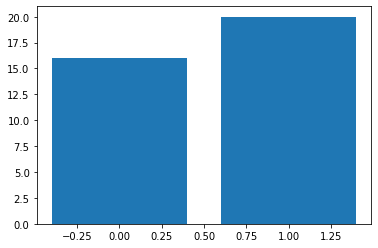

In [ ]:
count_label(y_train_hi)


Class=0, Count=34, Percentage=94.444%
Class=1, Count=2, Percentage=5.556%


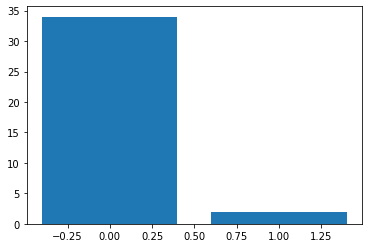

In [ ]:
count_label(y_train_lo)

In [ ]:
from imblearn.over_sampling import SMOTE
#strategy = {0:84,1:52,2:56}
strategy = {0:32,1:40} 
smt = SMOTE(strategy)
X_train_hi_SMOTE, y_train_hi_SMOTE = smt.fit_sample(X_train_hi, y_train_hi)


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (32) in class 0 will be larger than the number of samples in the majority class (class #1 -> 20)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:257: UserWarning: After over-sampling, the number of samples (40) in class 1 will be larger than the number of samples in the majority class (class #1 -> 20)
  n_samples_majority))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning

In [ ]:
X_train_lo.shape

(36, 144000)

In [ ]:
from imblearn.over_sampling import SMOTE
strategy = {0:34,1:34} 
smt = SMOTE(strategy,k_neighbors = 1)
X_train_lo_SMOTE, y_train_lo_SMOTE = smt.fit_sample(X_train_lo, y_train_lo)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


##### Reshape input shape

In [ ]:
nsamples,nxny = X_train_hi.shape
#nsamples,nx,ny = X_train_hi.shape
X_train_hi = X_train_hi.reshape(nsamples,1,nx*ny)
X_test_hi = X_test_hi.reshape(len(levels_hi)-nsamples,1,nx*ny)

In [ ]:
nsamples,nxy = X_train_lo.shape
#nsamples,nx,ny = X_train_lo.shape
X_train_lo = X_train_lo.reshape(nsamples,1,nxy)
X_test_lo = X_test_lo.reshape(len(levels_lo)-nsamples,1,nxy)

In [ ]:
nsamples, nxny = X_train_hi_SMOTE.shape
X_train_hi_SMOTE = X_train_hi_SMOTE.reshape(nsamples,1,nxny)

nsamples, nxny = X_train_lo_SMOTE.shape
X_train_lo_SMOTE = X_train_lo_SMOTE.reshape(nsamples,1,nxny)


##### Display input shape

In [ ]:
print(X_train_hi.shape,X_test_hi.shape)
print(X_train_lo.shape,X_test_lo.shape)

(36, 1, 144000) (9, 1, 144000)
(36, 1, 144000) (9, 1, 144000)


In [ ]:
X_train_hi_SMOTE.shape
X_train_lo_SMOTE.shape

(68, 1, 144000)

##### Save data as numpy array

In [ ]:
np.save('/content/drive/MyDrive/prepared_data/X_train_hi',X_train_hi)
np.save('/content/drive/MyDrive/prepared_data/X_test_hi',X_test_hi)
np.save('/content/drive/MyDrive/prepared_data/y_train_hi',y_train_hi)
np.save('/content/drive/MyDrive/prepared_data/y_test_hi',y_test_hi)

np.save('/content/drive/MyDrive/prepared_data/X_train_hi_SMOTE',X_train_hi_SMOTE)
np.save('/content/drive/MyDrive/prepared_data/y_train_hi_SMOTE',y_train_hi_SMOTE)

In [ ]:
np.save('/content/drive/MyDrive/prepared_data/X_train_lo',X_train_lo)
np.save('/content/drive/MyDrive/prepared_data/X_test_lo',X_test_lo)
np.save('/content/drive/MyDrive/prepared_data/y_train_lo',y_train_lo)
np.save('/content/drive/MyDrive/prepared_data/y_test_lo',y_test_lo)

np.save('/content/drive/MyDrive/prepared_data/X_train_lo_SMOTE',X_train_lo_SMOTE)
np.save('/content/drive/MyDrive/prepared_data/y_train_lo_SMOTE',y_train_lo_SMOTE)